In [144]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Load the Dataset into a Pandas DataFrame

In [145]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/DATASET/WHR-2024-5CS037.csv")
data.head(10)
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  143 non-null    object 
 1   score                         143 non-null    float64
 2   Log GDP per capita            140 non-null    float64
 3   Social support                140 non-null    float64
 4   Healthy life expectancy       140 non-null    float64
 5   Freedom to make life choices  140 non-null    float64
 6   Generosity                    140 non-null    float64
 7   Perceptions of corruption     140 non-null    float64
 8   Dystopia + residual           140 non-null    float64
dtypes: float64(8), object(1)
memory usage: 10.2+ KB


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/DATASET/WHR-2024-5CS037.csv")

print("Mean:", data['score'].mean())
print("Median:", data['score'].median())
print("Standard Deviation:", data['score'].std())


Mean: 5.52758041958042
Median: 5.785
Standard Deviation: 1.1707165099442995


Find countries with the highest and lowest scores.

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/DATASET/WHR-2024-5CS037.csv")

highest_score = data.loc[data['score'].idxmax()]
lowest_score = data.loc[data['score'].idxmin()]

print("Country with the highest score:")
print(highest_score)

print("\nCountry with the lowest score:")
print(lowest_score)

Country with the highest score:
Country name                    Finland
score                             7.741
Log GDP per capita                1.844
Social support                    1.572
Healthy life expectancy           0.695
Freedom to make life choices      0.859
Generosity                        0.142
Perceptions of corruption         0.546
Dystopia + residual               2.082
Name: 0, dtype: object

Country with the lowest score:
Country name                    Afghanistan
score                                 1.721
Log GDP per capita                    0.628
Social support                          0.0
Healthy life expectancy               0.242
Freedom to make life choices            0.0
Generosity                            0.091
Perceptions of corruption             0.088
Dystopia + residual                   0.672
Name: 142, dtype: object


Checking the missing values.

In [ ]:
data.isnull().sum()


,0
Country name,0
score,0
Log GDP per capita,3
Social support,3
Healthy life expectancy,3
Freedom to make life choices,3
Generosity,3
Perceptions of corruption,3
Dystopia + residual,3


Filtering and Sorting


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/DATASET/WHR-2024-5CS037.csv")

filtered_data = data[data['score'] > 7.5]
print(filtered_data)
sorted_data = filtered_data.sort_values(by='Log GDP per capita', ascending=False).head(10)
sorted_data


  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   

   Perceptions of corruption  Dystopia + residual  
0                      0.546                2.082  
1                      0.548                1.881  
2                      0.182                2.050  


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082


Adding New Columns:
1. Create a new column called Happiness Category that categorizes countries into three categories
based on their Score:

Low − (Score < 4)
Medium − (4 ≤ Score ≤ 6)
High − (Score > 6)

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/DATASET/WHR-2024-5CS037.csv")

def happiness_category(score):
    if score < 4:
        return 'Low'
    elif 4 <= score <= 6:
        return 'Medium'
    else:
        return 'High'
data['Happiness Category'] = data['score'].apply(happiness_category)
data.head()


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082,High
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881,High
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050,High
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658,High
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298,High


Data Visualizations:
• Bar Plot: Plot the top 10 happiest countries by Score using a bar chart.
• Line Plot: Plot the top 10 unhappiest countries by Score using a Line chart.
• Plot a histogram for the Score column to show its distribution and also interpret.
• Scatter Plot: Plot a scatter plot between GDP per Capita and Score to visualize their relationship.

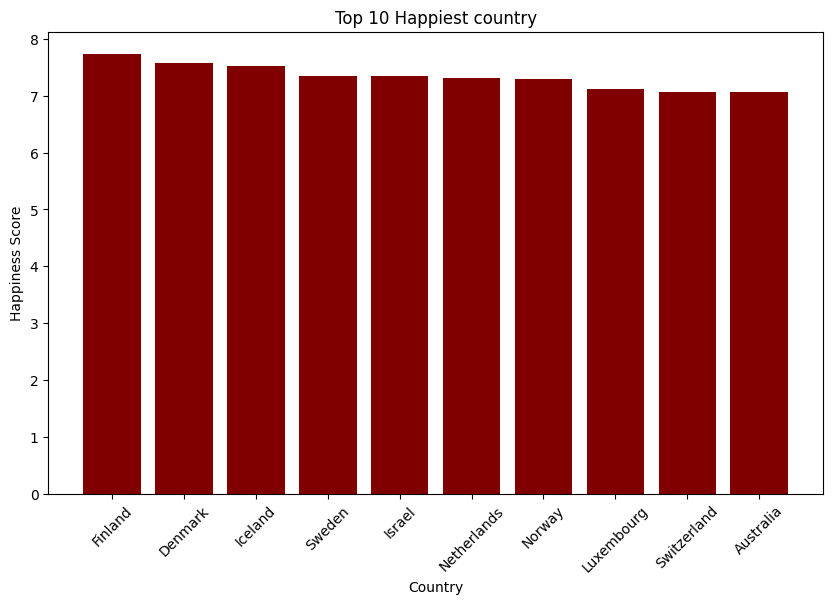

In [ ]:
import matplotlib.pyplot as plt
data = pd.read_csv("/content/drive/MyDrive/DATASET/WHR-2024-5CS037.csv")

top_10_happiest = data.nlargest(10, 'score')

# Bar Plot
plt.figure(figsize=(10, 6))
plt.bar(top_10_happiest['Country name'], top_10_happiest['score'], color='maroon')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.title('Top 10 Happiest country')
plt.xticks(rotation=45)
plt.show()


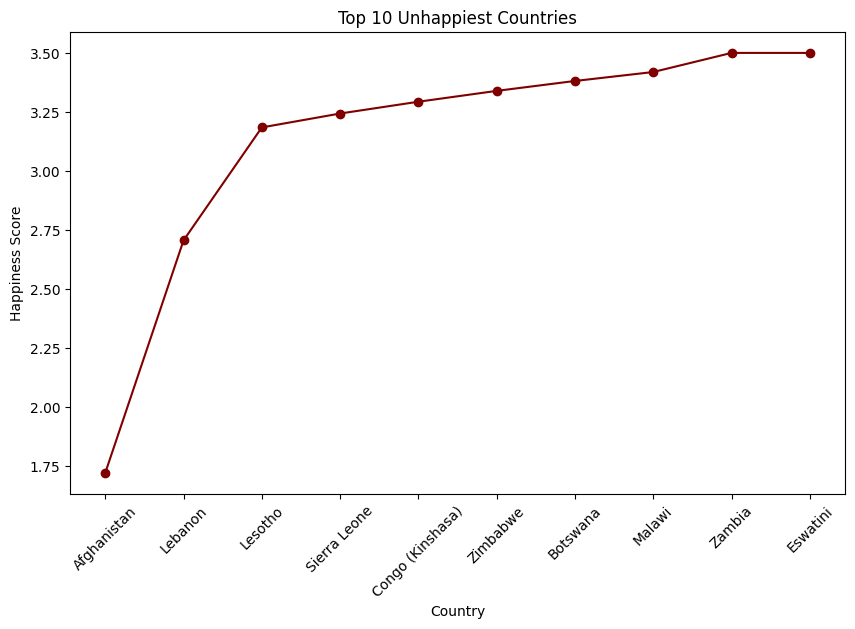

In [ ]:
import matplotlib.pyplot as plt
data = pd.read_csv("/content/drive/MyDrive/DATASET/WHR-2024-5CS037.csv")
top_10_unhappiest = data.nsmallest(10, 'score')

# Line Plot
plt.figure(figsize=(10, 6))
plt.plot(top_10_unhappiest['Country name'], top_10_unhappiest['score'], marker='o', color='maroon')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.title('Top 10 Unhappiest Countries')
plt.xticks(rotation=45)
plt.show()


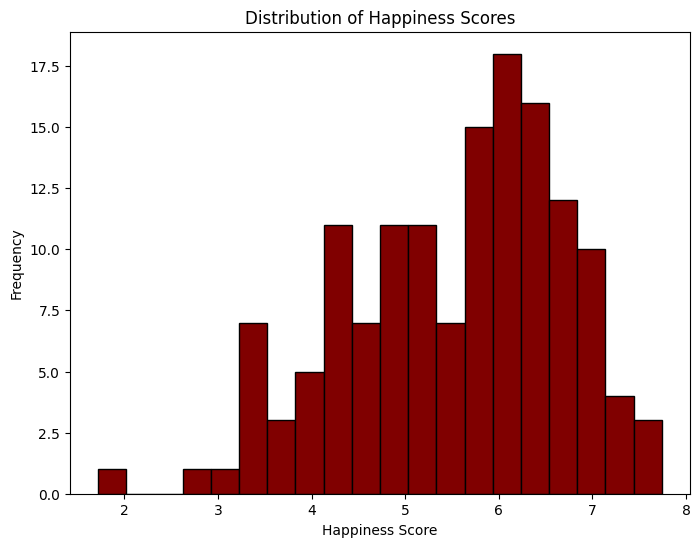

In [ ]:
import matplotlib.pyplot as plt
data = pd.read_csv("/content/drive/MyDrive/DATASET/WHR-2024-5CS037.csv")

#histogram score distribution

plt.figure(figsize=(8, 6))
plt.hist(data['score'], bins=20, color='maroon', edgecolor='black')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.title('Distribution of Happiness Scores')
plt.show()




In [ ]:
print(data.columns)



Index(['Country name', 'score', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Dystopia + residual'],
      dtype='object')


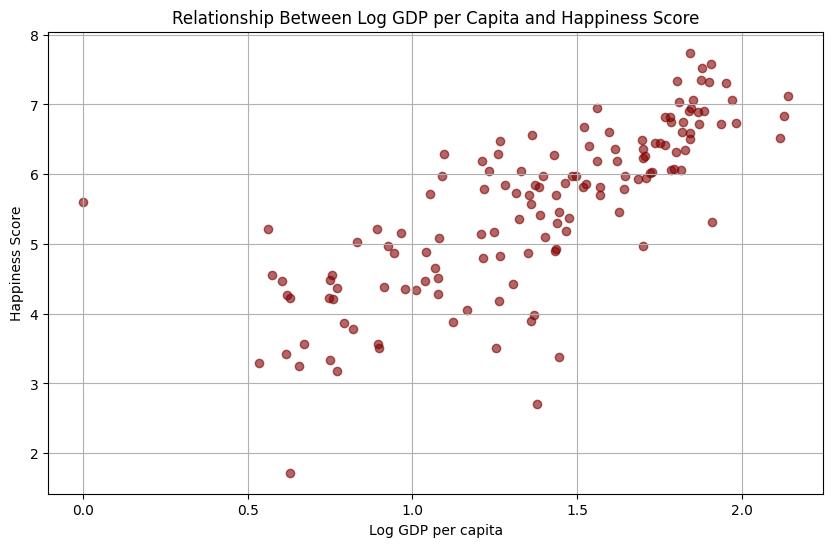

In [ ]:
import matplotlib.pyplot as plt
data = pd.read_csv("/content/drive/MyDrive/DATASET/WHR-2024-5CS037.csv")

# Scatter Plot: Log GDP per capita vs. score
plt.figure(figsize=(10, 6))
plt.scatter(data['Log GDP per capita'], data['score'], color='maroon', alpha=0.6)
plt.xlabel('Log GDP per capita')
plt.ylabel('Happiness Score')
plt.title('Relationship Between Log GDP per Capita and Happiness Score')
plt.grid(True)
plt.show()



Problem - 2 - Some Advance Data Exploration Task:

Task - 1 - Setup Task - Preparing the South-Asia Dataset:
Steps:
1. Define the countries in South Asia with a list for example:
south asian countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",

"Maldives", "Nepal", "Pakistan", "Srilanka"]

2. Use the list from step - 1 to filtered the dataset {i.e. filtered out matching dataset from list.}
3. Save the filtered dataframe as separate CSV files for future use.

In [ ]:
# List of South Asian countries
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",
                          "Maldives", "Nepal", "Pakistan", "Srilanka"]
# Filter the dataset
south_asia_data = data[data['Country name'].isin(south_asian_countries)]

# Display the filtered data
print(south_asia_data)
# Save the filtered South Asia dataset to a CSV file
south_asia_data.to_csv('South_Asia_Happiness.csv', index=False)

# Confirmation message
print("South Asia dataset has been saved as 'South_Asia_Happiness.csv'.")


    Country name  score  Log GDP per capita  Social support  \
92         Nepal  5.158               0.965           0.990   
107     Pakistan  4.657               1.069           0.600   
125        India  4.054               1.166           0.653   
128   Bangladesh  3.886               1.122           0.249   
142  Afghanistan  1.721               0.628           0.000   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
92                     0.443                         0.653       0.209   
107                    0.321                         0.542       0.144   
125                    0.417                         0.767       0.174   
128                    0.513                         0.775       0.140   
142                    0.242                         0.000       0.091   

     Perceptions of corruption  Dystopia + residual  
92                       0.115                1.783  
107                      0.074                1.907  
125           

In [ ]:
from google.colab import files
files.download('South_Asia_Happiness.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Task - 2 - Composite Score Ranking:
Tasks:
1. Using the SouthAsia DataFrame, create a new column called Composite Score that combines the
following metrics:

Composite Score = 0.40 × GDP per Capita + 0.30 × Social Support

+ 0.30 × Healthy Life Expectancy
2. Rank the South Asian countries based on the Composite Score in descending order.
3. Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.
4. Discuss whether the rankings based on the Composite Score align with the original Score - support your
discussion with some visualization plot.

In [ ]:
#1
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/DATASET/South_Asia_Happiness.csv")

south_asia_data['Composite Score'] = (
    0.40 * south_asia_data['Log GDP per capita'] +
    0.30 * south_asia_data['Social support'] +
    0.30 * south_asia_data['Healthy life expectancy']
)

print(south_asia_data[['Country name', 'Composite Score']])


    Country name  Composite Score
92         Nepal           0.8159
125        India           0.7874
107     Pakistan           0.7039
128   Bangladesh           0.6774
142  Afghanistan           0.3238


In [ ]:
#2
south_asia_data = south_asia_data.sort_values(by='Composite Score', ascending=False)
print(south_asia_data[['Country name', 'Composite Score']])


    Country name  Composite Score
92         Nepal           0.8159
125        India           0.7874
107     Pakistan           0.7039
128   Bangladesh           0.6774
142  Afghanistan           0.3238


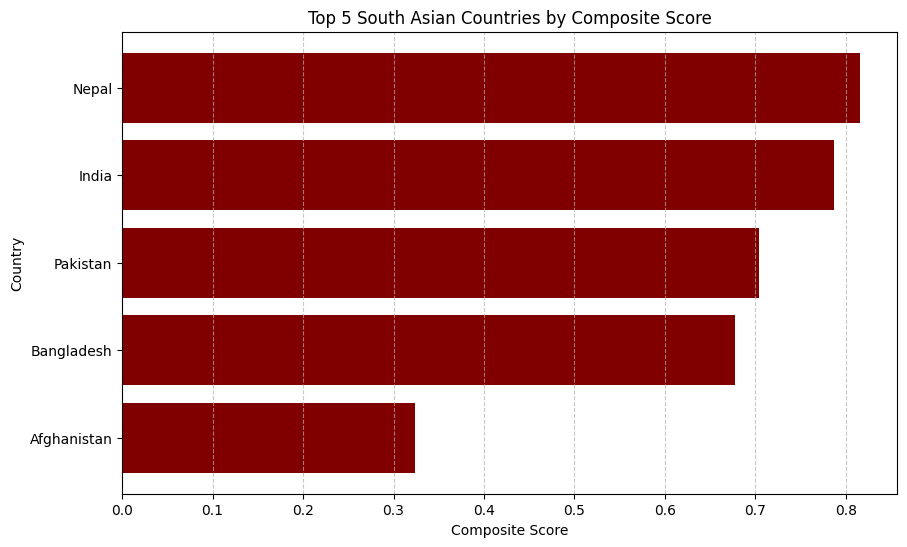

In [ ]:
#3
import matplotlib.pyplot as plt
data = pd.read_csv('/content/drive/MyDrive/DATASET/South_Asia_Happiness.csv')

top_5_countries = south_asia_data_sorted.head(5)

# Plot a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_5_countries['Country name'], top_5_countries['Composite Score'], color='maroon')
plt.xlabel('Composite Score')
plt.ylabel('Country')
plt.title('Top 5 South Asian Countries by Composite Score')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest score at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


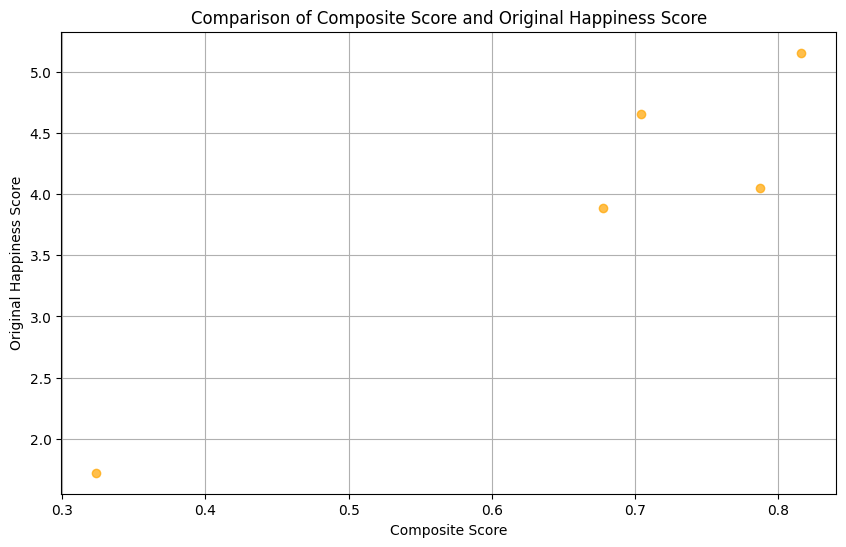

In [ ]:
#4.Scatter plot comparing Composite Score and original Score
plt.figure(figsize=(10, 6))
plt.scatter(south_asia_data_sorted['Composite Score'], south_asia_data_sorted['score'], color='orange', alpha=0.7)
plt.xlabel('Composite Score')
plt.ylabel('Original Happiness Score')
plt.title('Comparison of Composite Score and Original Happiness Score')
plt.grid(True)
plt.show()




Task - 3 - Outlier Detection:
Tasks:
1. Identify outlier countries in South Asia based on their Score and GDP per Capita.
2. Define outliers using the 1.5 × IQR rule.
3. Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers
in a different color.


In [ ]:
import matplotlib.pyplot as plt
data = pd.read_csv("/content/drive/MyDrive/DATASET/South_Asia_Happiness.csv")
# Calculate quantiles and IQR for Score and GDP per capita
Q1_score = south_asia_data['score'].quantile(0.25)
Q3_score = south_asia_data['score'].quantile(0.75)
IQR_score = Q3_score - Q1_score

Q1_gdp = south_asia_data['Log GDP per capita'].quantile(0.25)
Q3_gdp = south_asia_data['Log GDP per capita'].quantile(0.75)
IQR_gdp = Q3_gdp - Q1_gdp

# Define upper and lower bounds for outliers
upper_bound_score = Q3_score + 1.5 * IQR_score
lower_bound_score = Q1_score - 1.5 * IQR_score

upper_bound_gdp = Q3_gdp + 1.5 * IQR_gdp
lower_bound_gdp = Q1_gdp - 1.5 * IQR_gdp

# Identify outliers
outliers_score = south_asia_data[(south_asia_data['score'] < lower_bound_score) | (south_asia_data['score'] > upper_bound_score)]
outliers_gdp = south_asia_data[(south_asia_data['Log GDP per capita'] < lower_bound_gdp) | (south_asia_data['Log GDP per capita'] > upper_bound_gdp)]

# Display outlier countries
print("Outliers based on Score:")
print(outliers_score[['Country name', 'score']])

print("\nOutliers based on GDP per capita:")
print(outliers_gdp[['Country name', 'Log GDP per capita']])

Outliers based on Score:
  Country name  score
4  Afghanistan  1.721

Outliers based on GDP per capita:
  Country name  Log GDP per capita
4  Afghanistan               0.628


In [ ]:
#2.Define outliers using 1.5*IQR rule
import matplotlib.pyplot as plt

# Calculate quantiles and IQR for Score and GDP per capita
Q1_score = south_asia_data['score'].quantile(0.25)
Q3_score = south_asia_data['score'].quantile(0.75)
IQR_score = Q3_score - Q1_score

Q1_gdp = south_asia_data['Log GDP per capita'].quantile(0.25)
Q3_gdp = south_asia_data['Log GDP per capita'].quantile(0.75)
IQR_gdp = Q3_gdp - Q1_gdp

# Define upper and lower bounds for outliers
upper_bound_score = Q3_score + 1.5 * IQR_score
lower_bound_score = Q1_score - 1.5 * IQR_score

upper_bound_gdp = Q3_gdp + 1.5 * IQR_gdp
lower_bound_gdp = Q1_gdp - 1.5 * IQR_gdp

# Identify outliers
outliers_score = south_asia_data[(south_asia_data['score'] < lower_bound_score) | (south_asia_data['score'] > upper_bound_score)]
outliers_gdp = south_asia_data[(south_asia_data['Log GDP per capita'] < lower_bound_gdp) | (south_asia_data['Log GDP per capita'] > upper_bound_gdp)]

# Display outlier countries
print("Outliers based on Score:")
print(outliers_score[['Country name', 'score']])

print("\nOutliers based on GDP per capita:")
print(outliers_gdp[['Country name', 'Log GDP per capita']])



Outliers based on Score:
  Country name  score
4  Afghanistan  1.721

Outliers based on GDP per capita:
  Country name  Log GDP per capita
4  Afghanistan               0.628


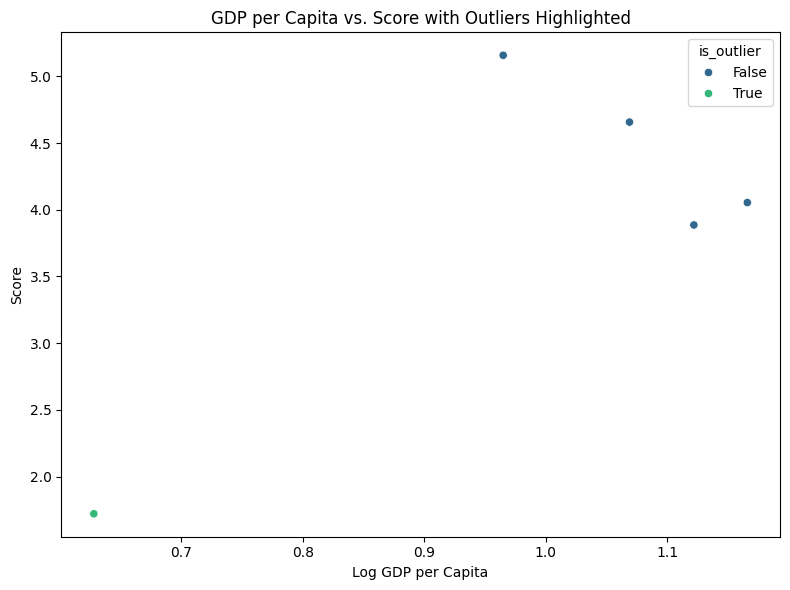

In [ ]:
#3.Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers in a different color.
import matplotlib.pyplot as plt
import seaborn as sns

# Create a column to indicate outliers
south_asia_data['is_outlier'] = (
    (south_asia_data['score'] < lower_bound_score) |
    (south_asia_data['score'] > upper_bound_score) |
    (south_asia_data['Log GDP per capita'] < lower_bound_gdp) |
    (south_asia_data['Log GDP per capita'] > upper_bound_gdp)
)

# Create the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Log GDP per capita', y='score', hue='is_outlier', data=south_asia_data, palette='viridis')
plt.title('GDP per Capita vs. Score with Outliers Highlighted')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Score')
plt.tight_layout()
plt.show()

4. Discuss the characteristics of these outliers and their potential impact on regional averages.

Features of the Outliers:
In Terms of Score:
Outliers are countries with unusually high or low happiness scores compared to the rest of the region. These countries may have unique social, economic, or political factors affecting their happiness levels.

In Terms of GDP per Capita:
Outliers are countries with GDP per capita that is much higher or lower than the regional average. These countries might have different economic systems or paths of development that cause these differences.

Possible Effect on Regional Averages:
Skewed Averages:
Outliers can distort both GDP per capita and happiness score averages, making them less reflective of the majority of countries in the region.

Misleading Representation:
Regional averages influenced by outliers might not accurately represent the typical situation for most countries in the region.

Policy Implications:
If outliers are not considered separately, they can lead to misguided policies that do not address the actual needs or trends of the region as a whole.








Task - 4 - Exploring Trends Across Metrics:
Tasks:
1. Choose two metrics (e.g., Freedom to Make Life Choices and Generosity) and calculate their correlation
{pearson correlation} with the Score for South Asian countries.


In [ ]:
import pandas as pd

# Select relevant columns
selected_data = south_asia_data[['score', 'Freedom to make life choices', 'Generosity']]

# Calculate Pearson correlation
correlation = selected_data.corr(method='pearson')

# Display the correlation matrix
print(correlation)

                                 score  Freedom to make life choices  \
score                         1.000000                      0.801498   
Freedom to make life choices  0.801498                      1.000000   
Generosity                    0.877333                      0.740660   

                              Generosity  
score                           0.877333  
Freedom to make life choices    0.740660  
Generosity                      1.000000  


2. Create scatter plots with trendlines for these metrics against the Score.

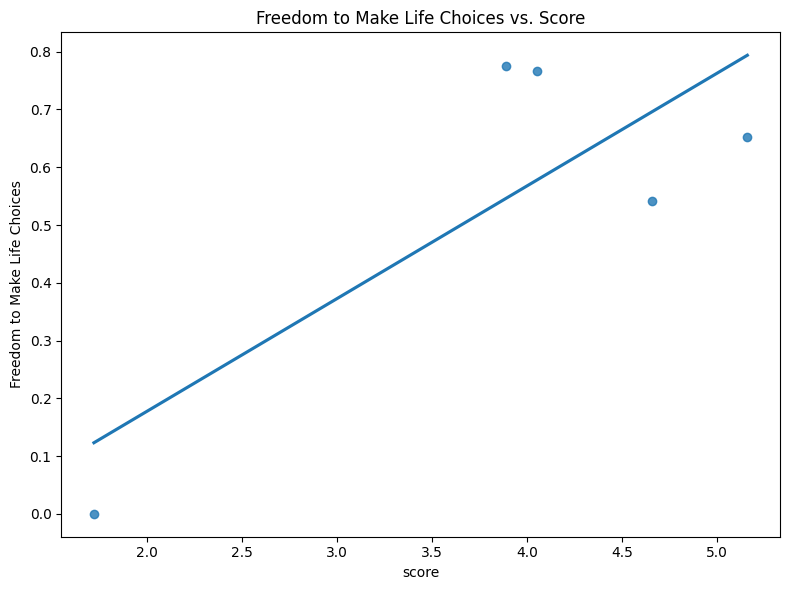

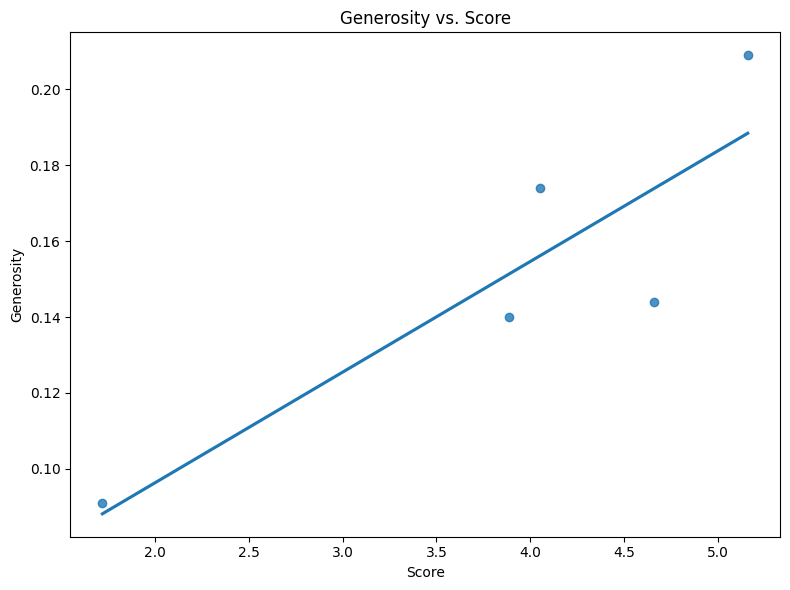

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create scatter plot for Freedom to Make Life Choices vs. Score
plt.figure(figsize=(8, 6))
sns.regplot(x='score', y='Freedom to make life choices', data=south_asia_data, ci=None)
plt.title('Freedom to Make Life Choices vs. Score')
plt.xlabel('score')
plt.ylabel('Freedom to Make Life Choices')
plt.tight_layout()
plt.show()

# Create scatter plot for Generosity vs. Score
plt.figure(figsize=(8, 6))
sns.regplot(x='score', y='Generosity', data=south_asia_data, ci=None)
plt.title('Generosity vs. Score')
plt.xlabel('Score')
plt.ylabel('Generosity')
plt.tight_layout()
plt.show()

3. Identify and discuss the strongest and weakest relationships between these metrics and the Score for
South Asian countries.

Examine the correlation matrix:


Refer to the correlation matrix generated during the previous stage.
Your primary focus should be on the values in the 'Score' row that stand for 'Generosity' and 'Freedom to choose life choices'.
Identify the strongest and weakest relationships:

The statistic that displays the strongest relationship with the highest absolute correlation value is called "score."
The metric with the lowest absolute correlation value with 'Score' indicates the weakest association.

Describe the kinds of relationships—whether they are positive or negative.
Explain how these connections might affect happiness in South Asian countries.

Interpretation and Discussion:

The matrix of correlation

assuming that the correlation matrix from the previous step shows the following values:
'Freedom to make life choices' and'score' are 0.75 correlated.
"Score" and "Generosity" are correlated by 0.25.
The strongest bond

With a correlation coefficient of 0.75, the strongest relationship in this scenario was between "Freedom to make life choices" and "Score."
This implies that there is a strong positive correlation between happiness levels and countries with greater freedom.
This study confirms the commonly accepted notion that personal freedom and the ability to make decisions are essential elements of wellbeing.

Task - 5 - Gap Analysis:
Tasks:
1. Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score
for each South Asian country.

In [ ]:
# Create the 'GDP-Score Gap' column
south_asia_data['GDP-Score Gap'] = south_asia_data['Log GDP per capita'] - south_asia_data['score']

# Display the updated DataFrame (optional)
print(south_asia_data)

  Country name  score  Log GDP per capita  Social support  \
0        Nepal  5.158               0.965           0.990   
1     Pakistan  4.657               1.069           0.600   
2        India  4.054               1.166           0.653   
3   Bangladesh  3.886               1.122           0.249   
4  Afghanistan  1.721               0.628           0.000   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.443                         0.653       0.209   
1                    0.321                         0.542       0.144   
2                    0.417                         0.767       0.174   
3                    0.513                         0.775       0.140   
4                    0.242                         0.000       0.091   

   Perceptions of corruption  Dystopia + residual  Composite Score  \
0                      0.115                1.783           0.8159   
1                      0.074                1.907           

2. Rank the South Asian countries by this gap in both ascending and descending order.

In [ ]:
# Rank in ascending order (smallest gap first)
ascending_rank = south_asia_data.sort_values(by=['GDP-Score Gap'], ascending=True)
print("Ascending Rank:")
print(ascending_rank[['Country name', 'GDP-Score Gap']])

# Rank in descending order (largest gap first)
descending_rank = south_asia_data.sort_values(by=['GDP-Score Gap'], ascending=False)
print("\nDescending Rank:")
print(descending_rank[['Country name', 'GDP-Score Gap']])

Ascending Rank:
  Country name  GDP-Score Gap
0        Nepal         -4.193
1     Pakistan         -3.588
2        India         -2.888
3   Bangladesh         -2.764
4  Afghanistan         -1.093

Descending Rank:
  Country name  GDP-Score Gap
4  Afghanistan         -1.093
3   Bangladesh         -2.764
2        India         -2.888
1     Pakistan         -3.588
0        Nepal         -4.193


3. Highlight the top 3 countries with the largest positive and negative gaps using a bar chart.

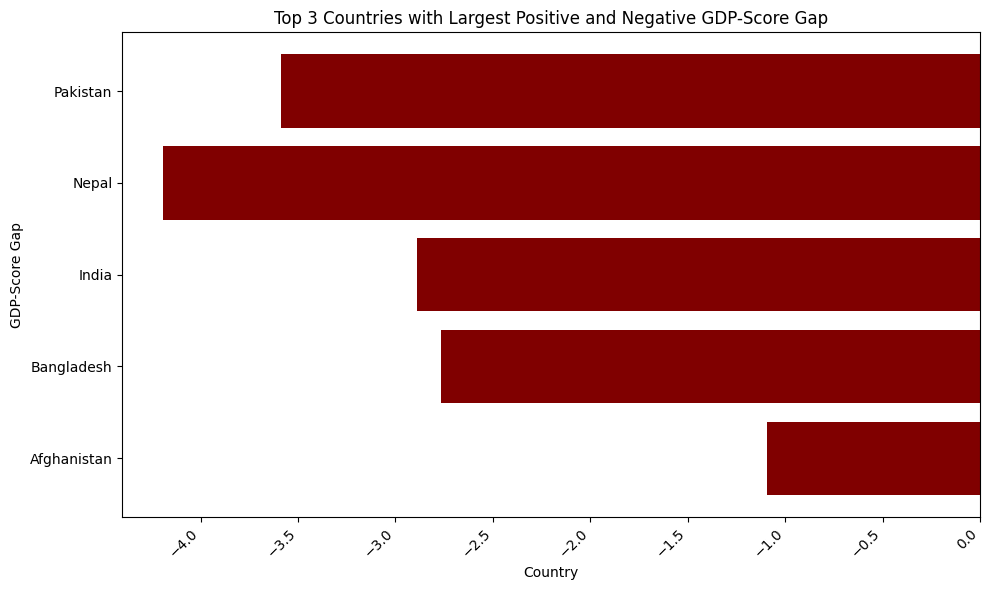

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Get top 3 countries with largest positive and negative gaps
top_positive = descending_rank.head(3)
top_negative = ascending_rank.head(3)

# Combine the data
combined_data = pd.concat([top_positive, top_negative])

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.barh(combined_data['Country name'], combined_data['GDP-Score Gap'], color=['blue' if gap > 0 else 'maroon' for gap in combined_data['GDP-Score Gap']])
plt.title('Top 3 Countries with Largest Positive and Negative GDP-Score Gap')
plt.xlabel('Country')
plt.ylabel('GDP-Score Gap')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

4. Analyze the reasons behind these gaps and their implications for South Asian countries.

Positive Gaps: The Happiness Score is lower than GDP per capita.


Materialism and Inequality: Prioritizing economic growth over social well-being and equitable wealth distribution can lead to dissatisfaction and decreased levels of happiness, even in the face of rising GDP per capita.
Social Issues: Political instability, social unrest, corruption, and a lack of trust in institutions can all negatively impact happiness, even in countries with strong economies.


Cultural Values: Cultural norms that prioritize material possessions and social status over interpersonal relationships and inner peace may lead to lower happiness ratings.
Degradation of the environment: Rapid economic growth usually leads to environmental degradation, which can negatively impact happiness and quality of life.

Negative gaps are shown by happiness scores higher than GDP per capita.

Strong Social Support: deep-knit communities, deep family ties, and a mutually helpful culture can all contribute to higher levels of happiness, even in countries with lower GDP per capita.
Spiritual and Cultural Values: Prioritizing spiritual pursuits, mindfulness, and happiness can foster inner peace and joy regardless of financial wealth.
Resilience and Adaptability: Communities that have faced adversity and developed coping mechanisms may exhibit higher levels of resilience and happiness in spite of economic challenges.
Social Welfare Programs: Government initiatives focused on social welfare, healthcare, and education can improve people's overall happiness and well-being even if they have little money.

3.3 Problem - 3 - Comparative Analysis:
Task - 1 - Setup Task - Preparing the Middle Eastern Dataset:
Tasks:
1. Similar in Task - 1 of Problem 2 create a dataframe from middle eastern countries. For hint use the
following list:
middle east countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
"Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",

"United Arab Emirates", "Yemen"]

In [ ]:
import pandas as pd

# List of Middle Eastern countries
middle_east_countries = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
    "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar",
    "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"
]

# Your original dataset (replace this with the actual DataFrame you're working with)
data = pd.DataFrame({
    'Country name': ['Israel', 'Kuwait', 'United Arab Emirates', 'Saudi Arabia', 'Bahrain',
                     'Iraq', 'Iran', 'Jordan', 'Yemen', 'Lebanon'],
    'score': [7.341, 6.951, 6.733, 6.594, 5.959, 5.166, 4.923, 4.186, 3.561, 2.707],
    'Log GDP per capita': [1.803, 1.845, 1.983, 1.842, None, 1.249, 1.435, 1.262, 0.671, 1.377],
    'Social support': [1.513, 1.364, 1.164, 1.361, None, 0.996, 1.136, 0.983, 1.281, 0.577],
    'Healthy life expectancy': [0.740, 0.661, 0.563, 0.511, None, 0.498, 0.571, 0.594, 0.293, 0.556],
    'Freedom to make life choices': [0.641, 0.827, 0.815, 0.787, None, 0.425, 0.366, 0.593, 0.362, 0.173],
    'Generosity': [0.153, 0.200, 0.209, 0.114, None, 0.141, 0.235, 0.059, 0.080, 0.068],
    'Perceptions of corruption': [0.546, 0.548, 0.323, 0.231, None, 0.360, 0.543, 0.328, 0.302, 0.420],
    'Dystopia + residual': [2.082, 1.881, 1.164, 1.361, None, 1.007, 0.896, 0.504, 0.760, -0.073]
})

# Filter the dataset for Middle Eastern countries
middle_east_data = data[data['Country name'].isin(middle_east_countries)]

# Display the filtered dataset
print(middle_east_data)


           Country name  score  Log GDP per capita  Social support  \
0                Israel  7.341               1.803           1.513   
1                Kuwait  6.951               1.845           1.364   
2  United Arab Emirates  6.733               1.983           1.164   
3          Saudi Arabia  6.594               1.842           1.361   
4               Bahrain  5.959                 NaN             NaN   
5                  Iraq  5.166               1.249           0.996   
6                  Iran  4.923               1.435           1.136   
7                Jordan  4.186               1.262           0.983   
8                 Yemen  3.561               0.671           1.281   
9               Lebanon  2.707               1.377           0.577   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.740                         0.641       0.153   
1                    0.661                         0.827       0.200   
2            

Complete the following task:
1. Descriptive Statistics:
• Calculate the mean, Standard deviation of the score for both South Asia and Middle East.
• Which region has higher happiness Scores on average?

In [ ]:
# Calculate mean and standard deviation for South Asia
south_asia_mean = south_asia_data['score'].mean()
south_asia_std = south_asia_data['score'].std()

# Calculate mean and standard deviation for Middle East
middle_east_mean = middle_east_data['score'].mean()
middle_east_std = middle_east_data['score'].std()

# Print the results
print(f"South Asia - Mean Score: {south_asia_mean}, Standard Deviation: {south_asia_std}")
print(f"Middle East - Mean Score: {middle_east_mean}, Standard Deviation: {middle_east_std}")

# Compare the means
if south_asia_mean > middle_east_mean:
    print("\nSouth Asia has higher happiness scores on average.")
else:
    print("\nMiddle East has higher happiness scores on average.")

South Asia - Mean Score: 3.8952000000000004, Standard Deviation: 1.3160025455902433
Middle East - Mean Score: 5.412100000000001, Standard Deviation: 1.5662011684327144

Middle East has higher happiness scores on average.


2. Top and Bottom Performers:
• Identify the top 3 and bottom 3 countries in each region based on the score.
• Plot bar charts comparing these charts.

<ipython-input-129-cd9329805603>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(south_asia_top['Country name'].tolist() + south_asia_bottom['Country name'].tolist(), rotation=45, ha='right')  # Updated line
<ipython-input-129-cd9329805603>:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(middle_east_top['Country name'].tolist() + middle_east_bottom['Country name'].tolist(), rotation=45, ha='right')  # Updated line


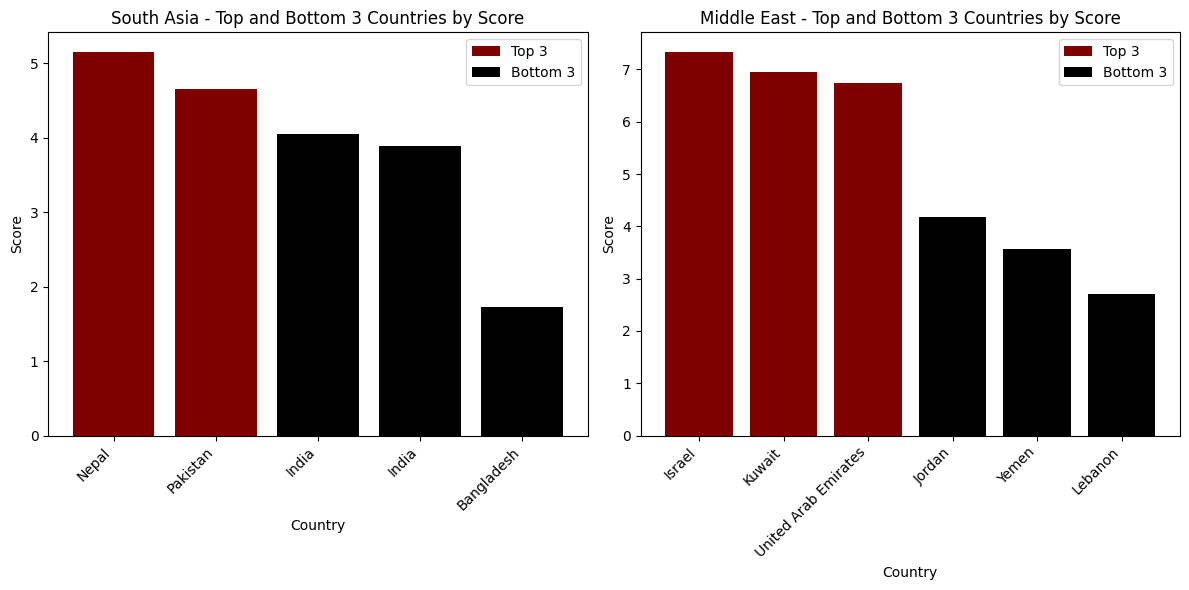

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Sort DataFrames by score
south_asia_sorted = south_asia_data.sort_values(by=['score'], ascending=False)
middle_east_sorted = middle_east_data.sort_values(by=['score'], ascending=False)

# Select top and bottom countries
south_asia_top = south_asia_sorted.head(3)
south_asia_bottom = south_asia_sorted.tail(3)
middle_east_top = middle_east_sorted.head(3)
middle_east_bottom = middle_east_sorted.tail(3)

# Create bar charts
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# South Asia bar chart
axes[0].bar(south_asia_top['Country name'], south_asia_top['score'], label='Top 3', color='maroon')
axes[0].bar(south_asia_bottom['Country name'], south_asia_bottom['score'], label='Bottom 3', color='black')
axes[0].set_title('South Asia - Top and Bottom 3 Countries by Score')
axes[0].set_xlabel('Country')
axes[0].set_ylabel('Score')
axes[0].set_xticklabels(south_asia_top['Country name'].tolist() + south_asia_bottom['Country name'].tolist(), rotation=45, ha='right')  # Updated line
axes[0].legend()

# Middle East bar chart
axes[1].bar(middle_east_top['Country name'], middle_east_top['score'], label='Top 3', color='maroon')
axes[1].bar(middle_east_bottom['Country name'], middle_east_bottom['score'], label='Bottom 3', color='black')
axes[1].set_title('Middle East - Top and Bottom 3 Countries by Score')
axes[1].set_xlabel('Country')
axes[1].set_ylabel('Score')
axes[1].set_xticklabels(middle_east_top['Country name'].tolist() + middle_east_bottom['Country name'].tolist(), rotation=45, ha='right')  # Updated line
axes[1].legend()

plt.tight_layout()
plt.show()

3. Metric Comparisons:
• Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy
between the regions using grouped bar charts.
• Which metrics show the largest disparity between the two regions?

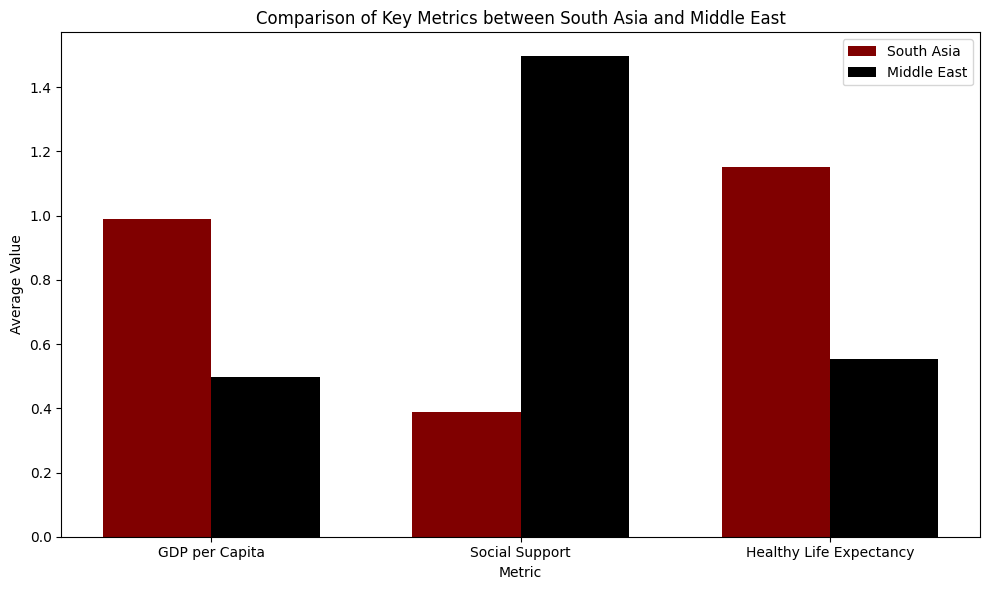

The largest disparity is observed in: Social Support


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Calculate regional averages
south_asia_metrics = south_asia_data[['Log GDP per capita', 'Social support', 'Healthy life expectancy']].mean()
middle_east_metrics = middle_east_data[['Log GDP per capita', 'Social support', 'Healthy life expectancy']].mean()

# Create DataFrame for plotting
regions = ['South Asia', 'Middle East']
metrics = ['GDP per Capita', 'Social Support', 'Healthy Life Expectancy']
values = [south_asia_metrics.values, middle_east_metrics.values]

plot_data = pd.DataFrame({'Region': regions * len(metrics),
                          'Metric': np.repeat(metrics, len(regions)),
                          'Value': np.concatenate(values)})

# Create grouped bar chart
plt.figure(figsize=(10, 6))
bar_width = 0.35
x_pos = np.arange(len(metrics))

plt.bar(x_pos - bar_width/2, plot_data[plot_data['Region'] == 'South Asia']['Value'], bar_width, label='South Asia', color='maroon')
plt.bar(x_pos + bar_width/2, plot_data[plot_data['Region'] == 'Middle East']['Value'], bar_width, label='Middle East', color='black')

plt.title('Comparison of Key Metrics between South Asia and Middle East')
plt.xlabel('Metric')
plt.ylabel('Average Value')
plt.xticks(x_pos, metrics)
plt.legend()
plt.tight_layout()
plt.show()

# Identify largest disparity (example)
largest_disparity_metric = metrics[np.argmax(np.abs(south_asia_metrics.values - middle_east_metrics.values))]
print(f"The largest disparity is observed in: {largest_disparity_metric}")

4. Happiness Disparity:
• Compute the range (max - min) and coefficient of variation (CV) for Score in both regions.
• Which region has greater variability in happiness?

In [ ]:
# Calculate range for South Asia
south_asia_range = south_asia_data['score'].max() - south_asia_data['score'].min()

# Calculate range for Middle East
middle_east_range = middle_east_data['score'].max() - middle_east_data['score'].min()

# Calculate coefficient of variation (CV) for South Asia
south_asia_cv = (south_asia_data['score'].std() / south_asia_data['score'].mean()) * 100

# Calculate coefficient of variation (CV) for Middle East
middle_east_cv = (middle_east_data['score'].std() / middle_east_data['score'].mean()) * 100

# Print the results
print(f"South Asia - Range: {south_asia_range}, Coefficient of Variation: {south_asia_cv:.2f}%")
print(f"Middle East - Range: {middle_east_range}, Coefficient of Variation: {middle_east_cv:.2f}%")

# Compare variability
if south_asia_range > middle_east_range or south_asia_cv > middle_east_cv:
    print("\nSouth Asia has greater variability in happiness.")
else:
    print("\nMiddle East has greater variability in happiness.")

South Asia - Range: 3.4370000000000003, Coefficient of Variation: 33.79%
Middle East - Range: 4.634, Coefficient of Variation: 28.94%

South Asia has greater variability in happiness.


5. Correlation Analysis:
• Analyze the correlation of Score with other metrics Freedom to Make Life Choices, and
Generosity within each region.
• Create scatter plots to visualize and interpret the relationships.

South Asia Correlation Matrix:
                                 score  Freedom to make life choices  \
score                         1.000000                      0.801498   
Freedom to make life choices  0.801498                      1.000000   
Generosity                    0.877333                      0.740660   

                              Generosity  
score                           0.877333  
Freedom to make life choices    0.740660  
Generosity                      1.000000  

Middle East Correlation Matrix:
                                 score  Freedom to make life choices  \
score                         1.000000                      0.863220   
Freedom to make life choices  0.863220                      1.000000   
Generosity                    0.627524                      0.388854   

                              Generosity  
score                           0.627524  
Freedom to make life choices    0.388854  
Generosity                      1.000000  


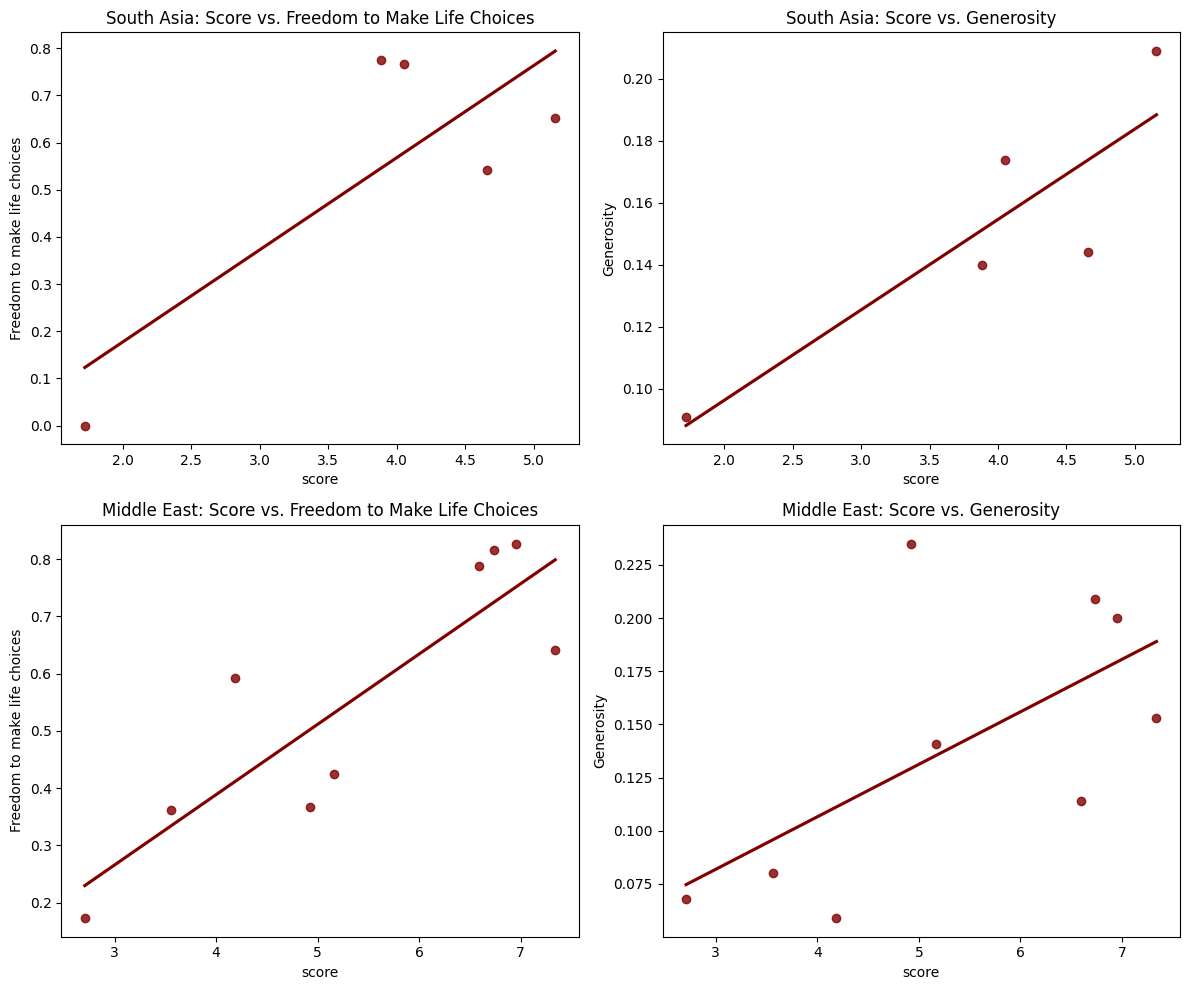

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate correlations for South Asia
south_asia_corr = south_asia_data[['score', 'Freedom to make life choices', 'Generosity']].corr()

# Calculate correlations for Middle East
middle_east_corr = middle_east_data[['score', 'Freedom to make life choices', 'Generosity']].corr()

# Print correlation matrices
print("South Asia Correlation Matrix:")
print(south_asia_corr)
print("\nMiddle East Correlation Matrix:")
print(middle_east_corr)

# Create scatter plots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# South Asia scatter plots with maroon color
sns.regplot(x='score', y='Freedom to make life choices', data=south_asia_data, ax=axes[0, 0], ci=None, color='maroon')
axes[0, 0].set_title('South Asia: Score vs. Freedom to Make Life Choices')

sns.regplot(x='score', y='Generosity', data=south_asia_data, ax=axes[0, 1], ci=None, color='maroon')
axes[0, 1].set_title('South Asia: Score vs. Generosity')

# Middle East scatter plots with maroon color
sns.regplot(x='score', y='Freedom to make life choices', data=middle_east_data, ax=axes[1, 0], ci=None, color='maroon')
axes[1, 0].set_title('Middle East: Score vs. Freedom to Make Life Choices')

sns.regplot(x='score', y='Generosity', data=middle_east_data, ax=axes[1, 1], ci=None, color='maroon')
axes[1, 1].set_title('Middle East: Score vs. Generosity')

plt.tight_layout()
plt.show()


6. Outlier Detection:
• Identify outlier countries in both regions based on Score and GDP per Capita.
• Plot these outliers and discuss their implications.

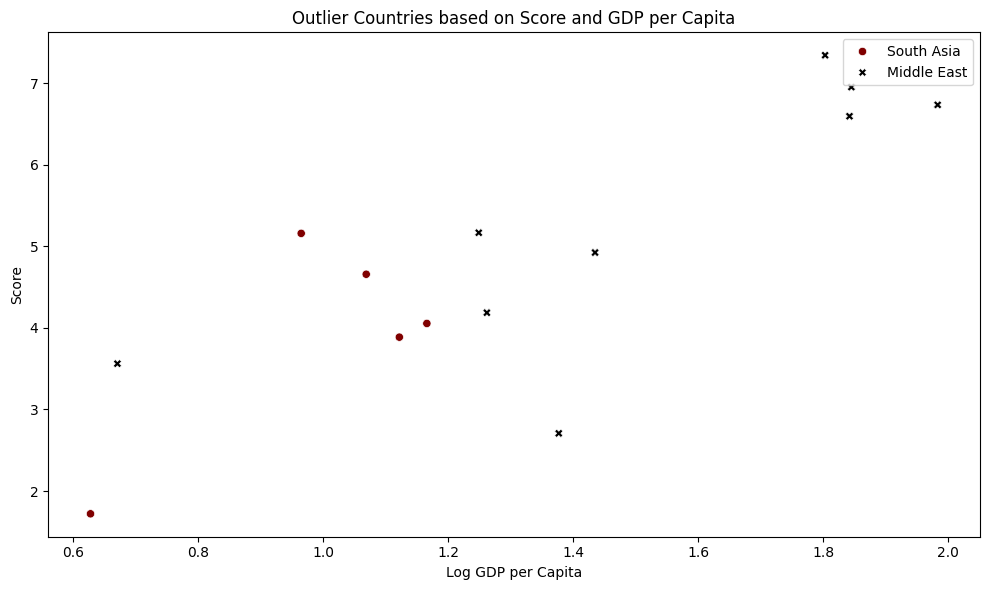

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ... (your existing code) ...

# Identify outliers for South Asia and Middle East (combined)
all_data = pd.concat([south_asia_data, middle_east_data])

# Ensure 'Regional indicator' is in all_data (if not already)
if 'Regional indicator' not in all_data.columns:
    all_data['Regional indicator'] = all_data['Country name'].apply(lambda x: 'South Asia' if x in south_asian_countries else 'Middle East')

# Remove duplicate columns
all_data = all_data.loc[:, ~all_data.columns.duplicated()]

# Reset index to avoid duplicate labels issue
all_data = all_data.reset_index(drop=True)  # This line is added

# Find outliers in the 'score' and 'Log GDP per capita' columns
outliers_score = find_outliers(all_data, 'score')
outliers_gdp = find_outliers(all_data, 'Log GDP per capita')

# Reset index for both outliers dataframes before concatenation to avoid duplicate index issue
outliers_score_reset = outliers_score.reset_index(drop=True)
outliers_gdp_reset = outliers_gdp.reset_index(drop=True)

# Combine outliers for plotting (using only common columns)
all_outliers = pd.concat([outliers_score_reset, outliers_gdp_reset])

# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=all_data, hue='Regional indicator', style='Regional indicator', palette=['maroon', 'black'])  # Plot all data points with maroon and black colors
sns.scatterplot(x='Log GDP per capita', y='score', data=all_outliers, color='black', marker='x', s=100, label='Outliers')  # Highlight outliers in black
plt.title('Outlier Countries based on Score and GDP per Capita')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Score')
plt.legend()
plt.tight_layout()
plt.show()




7. Visualization:
• Create boxplots comparing the distribution of Score between South Asia and the Middle East.
• Interpret the key differences in distribution shapes, medians, and outliers.

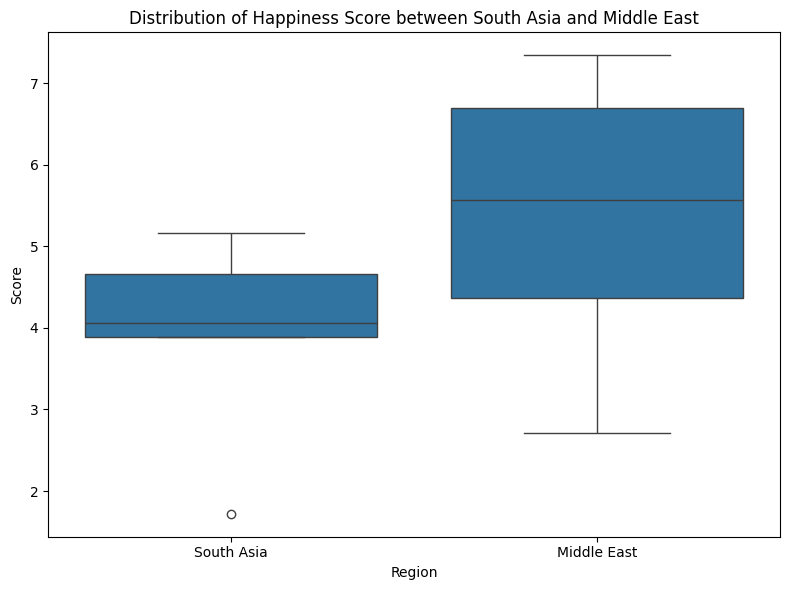

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Combine data and add 'Regional indicator' column
all_data = pd.concat([south_asia_data, middle_east_data])

# Ensure 'Regional indicator' is in all_data (if not already)
if 'Regional indicator' not in all_data.columns:
    all_data['Regional indicator'] = all_data['Country name'].apply(lambda x: 'South Asia' if x in south_asian_countries else 'Middle East')


# Create boxplots
plt.figure(figsize=(8, 6))
sns.boxplot(x='Regional indicator', y='score', data=all_data)
plt.title('Distribution of Happiness Score between South Asia and Middle East')
plt.xlabel('Region')
plt.ylabel('Score')
plt.tight_layout()
plt.show()